# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [38]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [103]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = 0
        for i in range(1,n+1):
            positions[i] = positions[i-1] + self.pickStep()  
        return positions


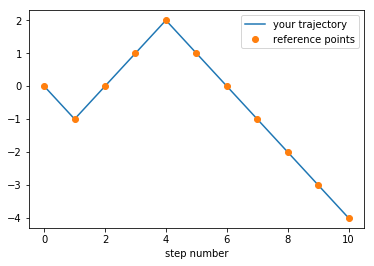

In [104]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

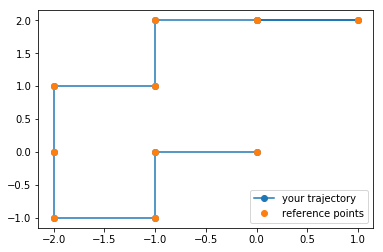

In [105]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

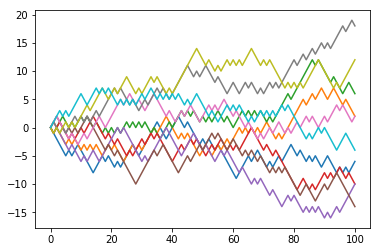

In [106]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)


**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


Text(0.5,1,'average position and average squared position for 100 walkers')

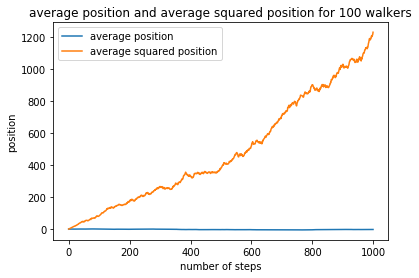

In [107]:
nsteps = 1000
ndim = 1
nwalkers = 100

simulations = numpy.array(numpy.zeros(100), object)
for i in range(0,100):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(1000)
    simulations[i] = ys
    
yav = numpy.array(numpy.zeros(1000), object)
for i in range(0,1000):
    val = 0
    for a in range(0,100):
        val = val + simulations[a][i]
    yav[i] = val/100
plt.plot(range(nsteps),yav, label = 'average position')

ysquaredav = numpy.array(numpy.zeros(1000), object)
for i in range(0,1000):
    val = 0
    for a in range(0,100):
        val = val + abs((simulations[a][i])**2)

        
    ysquaredav[i] = val/100
plt.plot(range(nsteps),ysquaredav,label = 'average squared position')

plt.legend()
plt.ylabel("position")
plt.xlabel("number of steps")
plt.title("average position and average squared position for 100 walkers")

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'analysis on dimensions affect of average squared position')

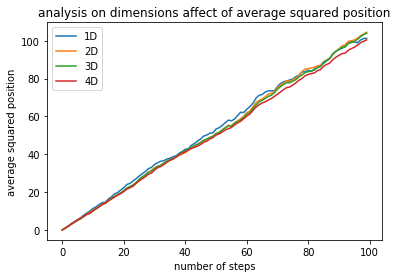

In [108]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

simulations1D = numpy.array(numpy.zeros(nwalkers), object)
for i in range(0,nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    simulations1D[i] = ys

rsquaredav1D = numpy.array(numpy.zeros(nsteps), object)
for i in range(0,nsteps):
    val = 0
    for a in range(0,nwalkers):
        val = val + abs((simulations1D[a][i])**2)
    rsquaredav1D[i] = val/nwalkers
plt.plot(range(nsteps),rsquaredav1D,label = '1D')


simulations2D = numpy.array(numpy.zeros(nwalkers), object)
for i in range(0,nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    simulations2D[i] = ys


rsquaredav2D = numpy.array(numpy.zeros(nsteps), object)
for i in range(0,nsteps):
    val = 0
    for a in range(0,nwalkers):
        val = val + abs((simulations1D[a][i])**2 + simulations2D[a][i]**2)
    rsquaredav2D[i] = val/(nwalkers*2)
    
plt.plot(range(nsteps),rsquaredav2D,label = '2D')


simulations3D = numpy.array(numpy.zeros(nwalkers), object)
for i in range(0,nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    simulations3D[i] = ys


rsquaredav3D = numpy.array(numpy.zeros(nsteps), object)
for i in range(0,nsteps):
    val = 0
    for a in range(0,nwalkers):
        val = val + abs((simulations1D[a][i])**2 + simulations2D[a][i]**2 + simulations3D[a][i]**2)
    rsquaredav3D[i] = val/(nwalkers*3)
    
plt.plot(range(nsteps),rsquaredav3D,label = '3D')

simulations4D = numpy.array(numpy.zeros(nwalkers), object)
for i in range(0,nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    simulations4D[i] = ys


rsquaredav4D = numpy.array(numpy.zeros(nsteps), object)
for i in range(0,nsteps):
    val = 0
    for a in range(0,nwalkers):
        val = val + abs((simulations1D[a][i])**2 + simulations2D[a][i]**2 + simulations3D[a][i]**2 + simulations4D[a][i]**2)
    rsquaredav4D[i] = val/(nwalkers*4)
    
plt.plot(range(nsteps),rsquaredav4D,label = '4D')

plt.legend()
plt.ylabel("average squared position")
plt.xlabel("number of steps")
plt.title("analysis on dimensions affect of average squared position")

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


[[-9.41323461e+00  6.71062942e+00]
 [-1.25451621e+00 -1.76458656e+00]
 [ 3.25674932e+00  5.06955715e+00]
 [ 4.50757892e-01  2.90417182e+00]
 [ 2.08502833e+00 -1.59660386e+00]
 [ 9.83118973e+00  1.74816108e+00]
 [ 1.61801476e+01 -5.55913202e+00]
 [-7.03173593e+00  1.46362107e+01]
 [ 7.39904621e-01 -1.13815666e+01]
 [ 2.98766681e+00  6.29995470e+00]
 [-2.36380233e+00  3.26153568e+00]
 [ 4.69816778e+00  9.88312352e-02]
 [ 1.10070554e+01 -7.35303825e-01]
 [ 2.44802412e+00 -7.49247692e+00]
 [-2.15644778e+00 -6.64124898e+00]
 [-5.96796085e+00  4.22651578e+00]
 [-2.47886299e+01 -1.29589432e+01]
 [ 1.03611045e+01 -1.17987791e+01]
 [ 6.79500128e+00 -1.04177893e+00]
 [ 1.31689479e+01 -7.79420761e-01]
 [-1.12841138e+01  3.41287926e-01]
 [-2.32726682e-01 -4.81342326e+00]
 [-9.54230905e-02 -4.58124850e+00]
 [-4.88636038e+00 -1.09310755e+01]
 [ 6.43538563e+00  8.90506827e+00]
 [ 3.43638215e+00 -6.98323566e+00]
 [ 6.55419494e+00 -5.18894307e+00]
 [ 2.13822553e+00 -3.04415212e+00]
 [-2.51156545e+00 -1

NameError: name 'fivehundred' is not defined

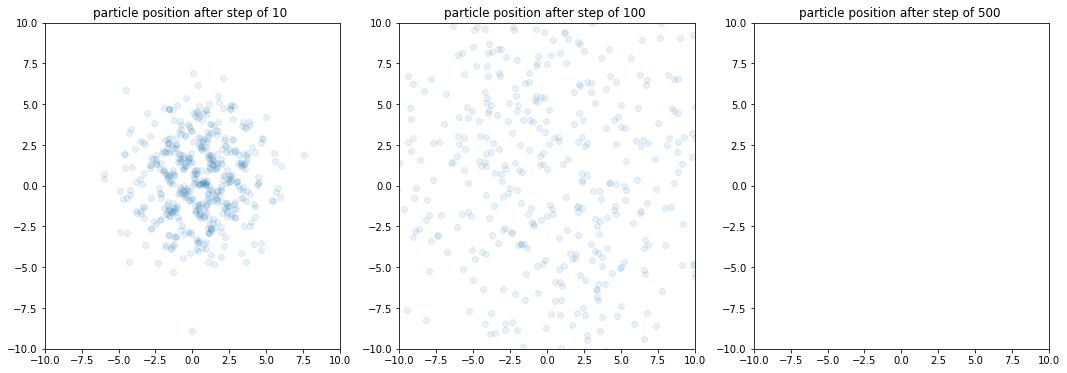

In [189]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
ten = rand_pos
for a in range(0,500):
    w = walker(numpy.zeros(2), ndim=2)
    pos_test = w.doSteps(10)
    for i in range(0,10):
        ten[a] = ten[a] + pos_test[i+1] - pos_test[i]
       
print(hundred)
#hundredfix = hundred        
#for a in range(0,500):
    #w = walker(numpy.zeros(2), ndim=2)
    #pos_test = w.doSteps(90)
    #for i in range(0,90):
        #hundredfix[a] = hundred[a] + pos_test[i+1] - pos_test[i]
        
       
#for a in range(0,500):
    #w = walker(numpy.zeros(2), ndim=2)
    #pos_test = w.doSteps(400)
    #for i in range(0,400):
        #|rand_posfivehundred[a] = rand_posfivehundred[a] + pos_test[i+1] - pos_test[i]


print(ten)

# this code is a template to create 3 subplots in one, adapt it tyo your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.title("particle position after step of {} ".format(nsteps))    
    if i == 0:
        plt.scatter(ten[:,0], ten[:,1], alpha=0.1)
    elif i == 1:
        plt.scatter(hundred[:,0], hundred[:,1], alpha=0.1)
    elif i == 2:
        plt.scatter(fivehundred[:,0], fivehundred[:,1], alpha=0.1)